<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feel free to import other libraries! 

In [3]:
df = pd.read_csv('../data/states_edu.csv')

Chosen test: **<hit `Enter` to edit>**

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [47]:
df.dropna()
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)

<h2> Feature Selection </h2>

_Use this space to modify or create features_

In [48]:
df["INSTRUCTION_EXPENDITURE_PER_STUDENT"] = df["INSTRUCTION_EXPENDITURE"] / df["ENROLL"]

Final feature list: **< Instruction Expenditure per student, Total Revenue, Year\>**

Feature selection justification: **<I chose Instruction expenditure per student because it is the amount of money put into each student. This feature should have an effect on the average test score and if it doesn't it is important to know that we don't need to spend as much money possibly. The total revenue feature was chosen to see how much a factor the wealth of the country effects the average test score. Lastly, I chose the year to be a feature because it is important to see whether we have made improvements over time in our education system.\>**

<h2> EDA </h2>

Visualization 1

Text(0, 0.5, 'AVG_MATH_8_SCORE')

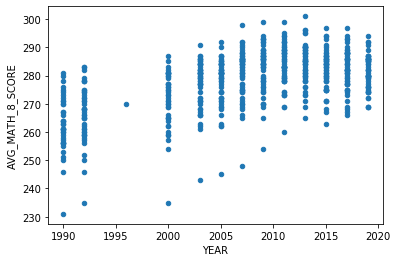

In [49]:
df.plot.scatter(x="YEAR", y="AVG_MATH_8_SCORE")
plt.xlabel("YEAR")
plt.ylabel("AVG_MATH_8_SCORE")

**< This graph displays how much the average math score for eigth graders is dependent on the year >**

Visualization 2

Text(0, 0.5, 'AVG_MATH_8_SCORE')

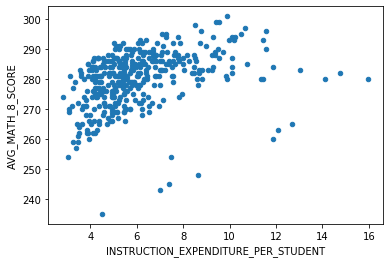

In [46]:
# create a scatterplot that looks at the relationship between the average math score and the instruction expenditure per student
df.plot.scatter(x="INSTRUCTION_EXPENDITURE_PER_STUDENT", y="AVG_MATH_8_SCORE")
plt.xlabel("INSTRUCTION_EXPENDITURE_PER_STUDENT")
plt.ylabel("AVG_MATH_8_SCORE")

**< This graph displays how much the average math score for those in the Eitgth grade is dependent on the amount paid for instruction per student>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X = df[['TOTAL_REVENUE','INSTRUCTION_EXPENDITURE_PER_STUDENT','YEAR']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

Chosen ML task: **<REGRESSION/CLASSIFICATION>**

In [39]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [40]:
# create your model here
model = LinearRegression()

In [41]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
y_pred = model.predict(X_test)

In [43]:
# FOR CLASSIFICATION ONLY:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)

ValueError: plot_confusion_matrix only supports classifiers

Text(0, 0.5, 'Math 8 score')

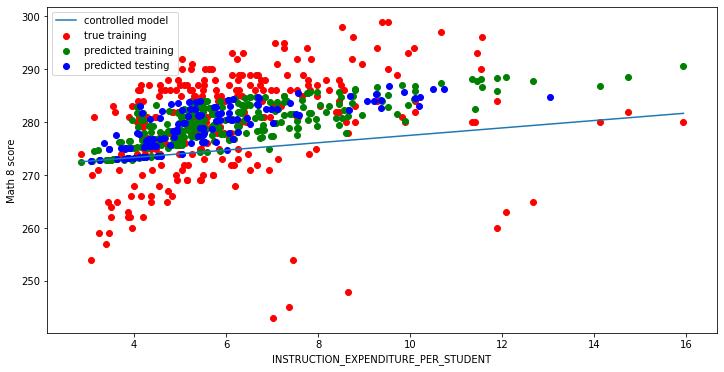

In [51]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'INSTRUCTION_EXPENDITURE_PER_STUDENT'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel("Math 8 score")

<h2> Summary </h2>

**< The features I chose to focus on were the total revenue for the country, the instruction expenditure per student and the year in which the tests were taken. The total revenue and the year were given in the table; however, I did need to calculate the instruction expenditure per student by taking the total instruction expenditure and dividing it by the total enrollment. I created two graphs, one to look at the relationship between the year and the average math 8 score, and one to look at the relationship between the instruction expenditure per student and the average math 8 score. The first graph showed a slight positive linear relationship meaning that as we progress through the years the average test scores increase. The second graph also showed a positive linear relationship meaning that an increase in instruction expenditure per student seems to be a factor in increasing test scores. I then trained an ML model on my chosen features of total revenue, instruction expenditure per student, and the year. I chose a linear regression model to represent this training data. Through this I have seen that there are many factors that have an effect on the average test scores; however, it seems that the year and the instruction expenditure per student are the best predictors of student performance.\>**